# Evaluation of the long term dynamics of the model.

Data from runs over 3000 years for different possible income from trade.

Single trajectories are also evaluated, since the aggregate data does not give insight into the actual model behavior.

**NOTE:** These runs are done without climate variability. The variation is only caused by interplay of social and ecological dynamics in the system.

In [2]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14, 6)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

d_start = 150
d_length = 20

testing = False

location = '/home/jakob/Project_MayaSim/output_data/X8_longterm_dynamics/results/trajectory'
if testing:
    location = '/home/jakob/Project_MayaSim/output_data/test_output/X8_longterm_dynamics/results/trajectory'
    
data = pd.read_pickle(location)

def plot(obs, data):
    r_trades = data.index.levels[0].values
    fig = plt.figure()
    k = 0
    plots = []
    for j, r in enumerate(r_trades):
        k += 1
        ax = fig.add_subplot(1, len(r_trades), j + 1)
        ax.set_title('{}) r_trade = {}'.format(k, r))
        dt = data['<mean_trajectories>'].xs(level=('r_trade', 'observables'), key=(r, obs))
        de = data['<sigma_trajectories>'].xs(level=('r_trade', 'observables'), key=(r, obs))
        dt.plot(ax=ax)
        dtt = de.index.values
        ddt = dt.values
        dde = de.values
        plt.fill_between(dtt, ddt - dde, ddt + dde, alpha=0.2)

        ax.set_ylabel(obs)
        #ax.axvspan(d_start, d_start + d - 1, alpha=0.5, color='grey')
        plots.append((r, k, obs))
        ax.set_xticklabels(ax.xaxis.get_majorticklabels(), rotation=45)
        fig.tight_layout()
    return (fig, plots)
print(data.index.levels)

Populating the interactive namespace from numpy and matplotlib
[[6000, 8000, 10000], [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, ...], ['MAP', 'built trade links', 'es_income_agricultural_productivity', 'es_income_forest', 'es_income_pop_density', 'es_income_precipitation', 'es_income_waterflow', 'forest_state_1_cells', 'forest_state_2_cells', 'forest_state_3_cells', 'killed settlements', 'lost trade links', 'max_AG', 'max_ES', 'max_bca', 'max_cluster_size', 'max_npp', 'max_pop_grad', 'max_soil_deg', 'mean_cluster_size', 'mean_soil_degradation', 'mean_waterflow', 'new settlements', 'time', 'total_agriculture_cells', 'total_cells_in_influence', '

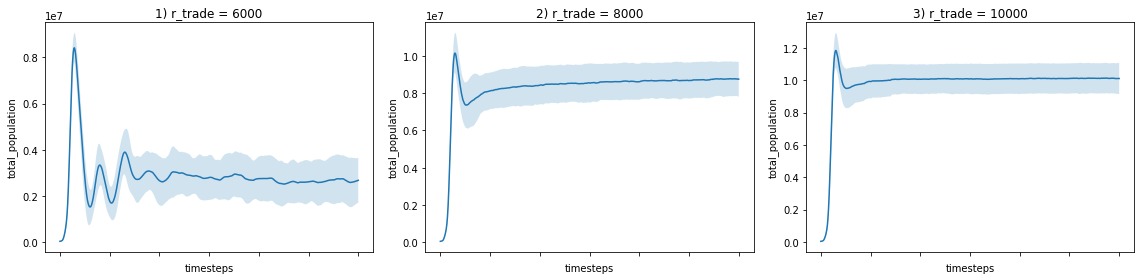

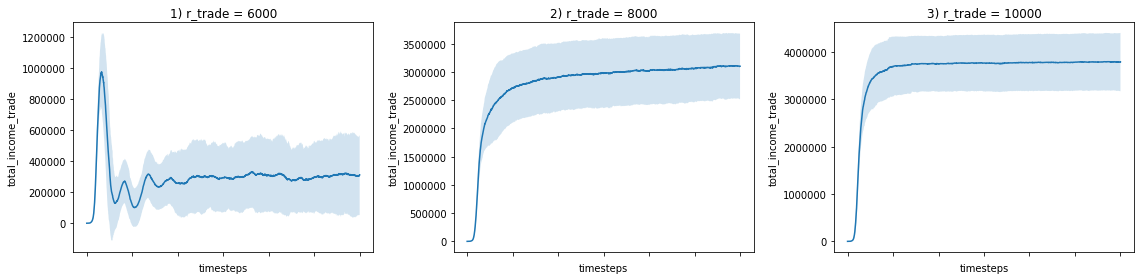

In [3]:
pylab.rcParams['figure.figsize'] = (16, 4)

r_trades = data.index.levels[0].values

fig, plots = plot('total_population', data)

fig, plots = plot('total_income_trade', data)

**The plots above show the long run data (aggregated from 50 runs) for total population and total income from trade**

We see:

* an overshoot and collapse behavior with fluctuation in the long run for possible income from trade, 
* some sort of saturation for intermediate income from taded and 
* an even quicker saturation for high possible income from trade.

To get some more information, a closer look at individual trajectories is required.

In [4]:
location = '/home/jakob/Project_MayaSim/output_data/X8_longterm_dynamics/results/all_trajectories'
all_data = pd.read_pickle(location)

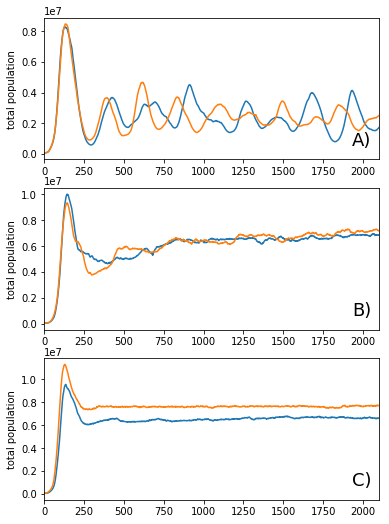

In [5]:
pylab.rcParams['figure.figsize'] = (6, 12)
all_data.columns = range(0,2)
all_data.loc[6000, 1]

runs  = range(0, 2)
r_trades = all_data.index.values
fig = plt.figure()

annotations=['A)', 'B)', 'C)', 'D)']
for i, r_trade in enumerate(r_trades[[0, 1, 3]]):
    
    ax = fig.add_subplot(4, 1, i + 1)
    observable = 'total_population'

    for run in [0,1]:
        all_data.loc[r_trade, run][observable].plot(legend=(True if i == len(r_trades) - 1 else False))
    ax.set_xlim([0,2100])
    ax.annotate(annotations[i], xy=(0,0), xycoords='data', xytext=(0.92, 0.1), textcoords='axes fraction', fontsize=18)
    ax.set_ylabel('total population')
    if i == len(r_trades)-1:
        ax.set_xlabel('time in years')
        leg = ax.get_legend()
        for j, text in enumerate(leg.get_texts()):
            text.set_text('run {}'.format(j+1))

plt.savefig('longterm_population_development.pdf')

**The plots above show the total population of single two single runs for different possible trade income.**

We see:

* cyclical rise and fall for low possible income from trade,
* stable society with high trade income with higher possible income from trade

This is in accordance with findings in archeological reserach that state that there have been cycles of growth and collapse in the Maya civilisation from 2000 BC to ~ 0 BC and that only after that in the socalled Classical Period a signifficant overshoot and collapse without recovery was observed.

In our model, this can be reproduced via an increase in trade efficiency, that leads to qualitatively different model behavior.

/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


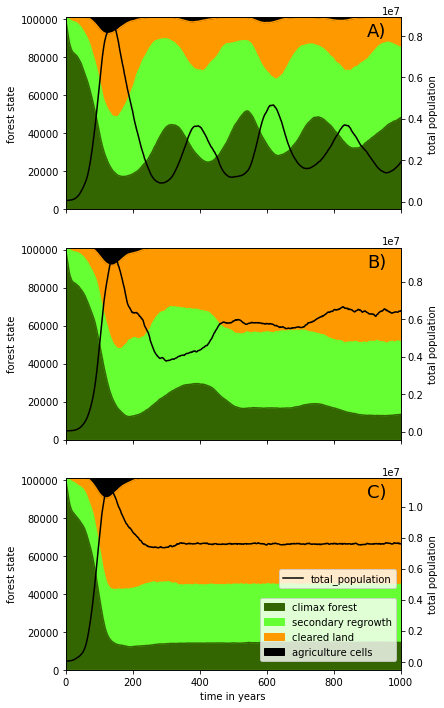

In [6]:
pylab.rcParams['figure.figsize'] = (6, 12)
all_data.columns = range(0,2)
all_data.loc[6000, 1]

runs  = range(0, 2)
r_trades = all_data.index.values
fig = plt.figure()

annotations=['A)', 'B)', 'C)']
colors = ['#336600', '#66FF33', '#FF9900', 'black']
for i, r_trade in enumerate(r_trades[[0,1,3]]):
    
    ax = fig.add_subplot(3, 1, i + 1)
    observables = ['forest_state_3_cells', 'forest_state_2_cells', 'forest_state_1_cells', 'total_agriculture_cells']
    forest_data = all_data.loc[r_trade, run][observables]
    forest_data['forest_state_1_cells'] = forest_data['forest_state_1_cells'].sub(forest_data['total_agriculture_cells'])
    forest_data.columns = ['climax forest', 'secondary regrowth', 'cleared land', 'agriculture cells']
    run = 1
    ln1 = forest_data.plot.area(stacked=True, 
                                legend=(True if i == len(r_trades) - 2 else False), 
                                ax=ax,
                                color=colors)
    ax2 = ax.twinx()
    ln2 = all_data.loc[r_trade, run]['total_population'].plot(legend=(True if i == len(r_trades) - 2 else False), 
                                                              ax=ax2, 
                                                              color='k')
    #print(all_data.loc[r_trade, run][observables])
    ax.set_xlim([0,1000])
    ax.annotate(annotations[i], xy=(0,0), xycoords='data', xytext=(0.9, 0.9), textcoords='axes fraction', fontsize=18)
    ax2.set_ylabel('total population')
    ax.set_ylabel('forest state')
    ax.set_ylim([0, 101000])
    if i == len(r_trades)-2:
        ax.set_xlabel('time in years')
        lgd2 = ax.legend(loc=1, bbox_to_anchor=[1, .4])
        lgd1 = ax2.legend(loc=1, bbox_to_anchor=[1., .55])
#fig.tight_layout()
fig.savefig('longterm_population_development.pdf', transparent=True, dpi=200)

Jona suggested, that these simulations show very little agricultural activity, which is very different from the original results by Heckbert. I can not really make this out from these plots, since in Heckberts results, he only shows income from agriculture and not agriculture cells vs. other states of cells.

If the data is there, I will try to plot the above plot with different sources of income for better comparibility.

In [15]:
location = '/home/jakob/Project_MayaSim/output_data/X8_longterm_dynamics/results/all_trajectories'
all_data = pd.read_pickle(location)
all_data.columns = range(0,2)
all_data.loc[6000, 1].columns

Index(['time', 'total_population', 'max settlement population',
       'total_migrants', 'total_settlements', 'total_agriculture_cells',
       'total_cells_in_influence', 'total_trade_links', 'mean_cluster_size',
       'max_cluster_size', 'new settlements', 'killed settlements',
       'built trade links', 'lost trade links', 'total_income_agriculture',
       'total_income_ecosystem', 'total_income_trade', 'mean_soil_degradation',
       'forest_state_3_cells', 'forest_state_2_cells', 'forest_state_1_cells',
       'es_income_forest', 'es_income_waterflow',
       'es_income_agricultural_productivity', 'es_income_precipitation',
       'es_income_pop_density', 'MAP', 'max_npp', 'mean_waterflow', 'max_AG',
       'max_ES', 'max_bca', 'max_soil_deg', 'max_pop_grad'],
      dtype='object')

/home/jakob/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


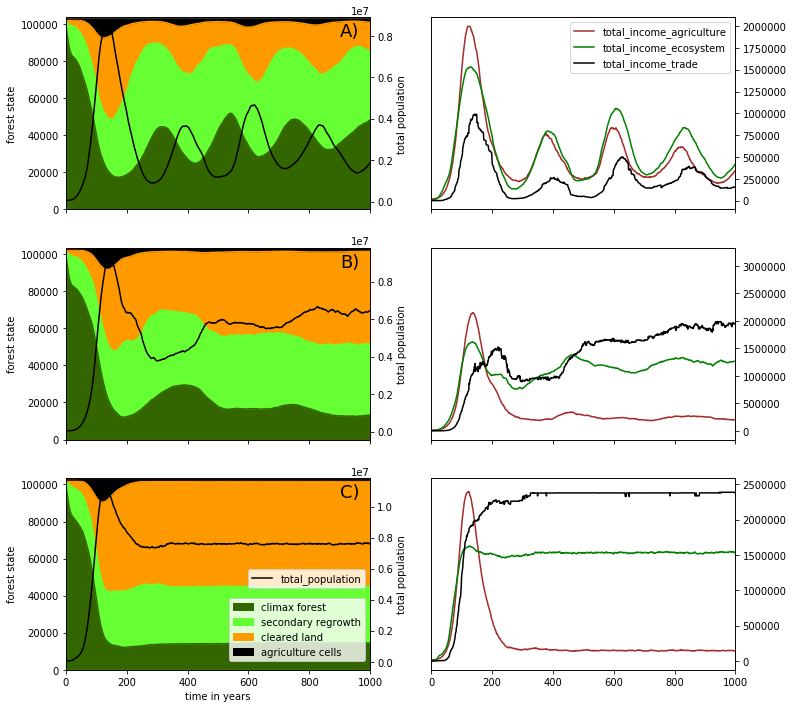

In [33]:
pylab.rcParams['figure.figsize'] = (12, 12)
all_data.columns = range(0,2)
all_data.loc[6000, 1]

runs  = range(0, 2)
r_trades = all_data.index.values
fig = plt.figure()

annotations=['A)', 'B)', 'C)']
colors = ['#336600', '#66FF33', '#FF9900', 'black']
for i, r_trade in enumerate(r_trades[[0,1,3]]):
    
    ax = fig.add_subplot(3, 2, 2*i + 1)
    ax3a = fig.add_subplot(3, 2, 2*i + 2)
    ax3 = ax3a.twinx()
    observables = ['forest_state_3_cells', 'forest_state_2_cells', 'forest_state_1_cells', 'total_agriculture_cells']
    forest_data = all_data.loc[r_trade, run][observables]
    forest_data['forest_state_1_cells'] = forest_data['forest_state_1_cells'].sub(forest_data['total_agriculture_cells'])
    forest_data.columns = ['climax forest', 'secondary regrowth', 'cleared land', 'agriculture cells']
    run = 1
    ln1 = forest_data.plot.area(stacked=True, 
                                legend=(True if i == len(r_trades) - 2 else False), 
                                ax=ax,
                                color=colors)
    ax2 = ax.twinx()
    ln2 = all_data.loc[r_trade, run]['total_population'].plot(legend=(True if i == len(r_trades) - 2 else False), 
                                                              ax=ax2, 
                                                              color='k')
    ln3 = all_data.loc[r_trade, run]['total_income_agriculture'].plot(legend=(True if i == 0 else False), 
                                                              ax=ax3, 
                                                              color='brown')
    ln4 = all_data.loc[r_trade, run]['total_income_ecosystem'].plot(legend=(True if i == 0 else False), 
                                                              ax=ax3, 
                                                              color='g')
    ln5 = all_data.loc[r_trade, run]['total_income_trade'].plot(legend=(True if i == 0 else False), 
                                                              ax=ax3, 
                                                              color='k')
    
    ax3a.set_yticklabels([])
    ax3a.set_yticks([])
    
    #print(all_data.loc[r_trade, run][observables])
    ax.set_xlim([0,1000])
    ax3.set_xlim([0,1000])
    ax.annotate(annotations[i], xy=(0,0), xycoords='data', xytext=(0.9, 0.9), textcoords='axes fraction', fontsize=18)
    ax2.set_ylabel('total population')
    ax.set_ylabel('forest state')
    ax.set_ylim([0, 103500])
    if i == len(r_trades)-2:
        ax.set_xlabel('time in years')
        ax3.set_xlabel('time in years')
        lgd2 = ax.legend(loc=1, bbox_to_anchor=[1, .4])
        lgd1 = ax2.legend(loc=1, bbox_to_anchor=[1., .55])
#fig.tight_layout()
fig.savefig('longterm_population_development.pdf', transparent=True, dpi=200)

Compared to Heckbert2013 fig. 5 these results suggest, that his configuration is similar to that in pannel A) but with a bit higher income from trade and lower ecosystem services value.

Therefore, I should set up an experiment that starts with this configuration and then tweaks these two variables in the respective direction to see at which point I can generate comparable results.